In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import utc

In [2]:
# Import data
data = pd.read_csv('data/reviews.csv', parse_dates=['Timestamp'])
data

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN
...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN


### Rating average/count by day

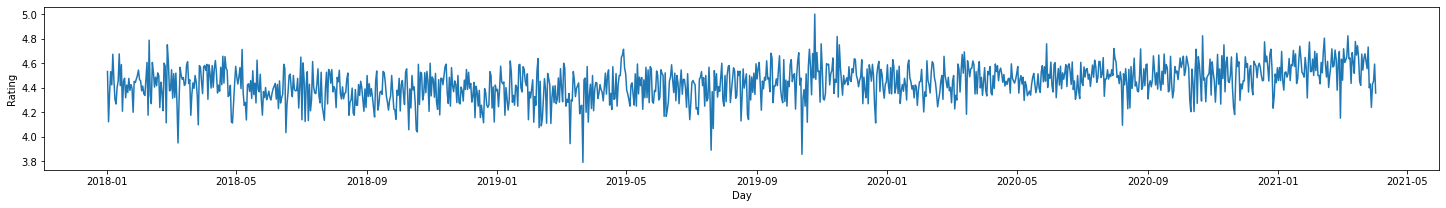

In [3]:
# Group ratings by day
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()

plt.figure(figsize=(25,3))
plt.plot(day_average.index, day_average['Rating'])
plt.xlabel('Day')
plt.ylabel('Rating')
plt.show()

### Rating average by week

In [4]:
# Extract week for each year, instead of overlapping weeks from different years
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
data['Week']

0        2021-13
1        2021-13
2        2021-13
3        2021-13
4        2021-13
          ...   
44995    2018-00
44996    2018-00
44997    2018-00
44998    2018-00
44999    2018-00
Name: Week, Length: 45000, dtype: object

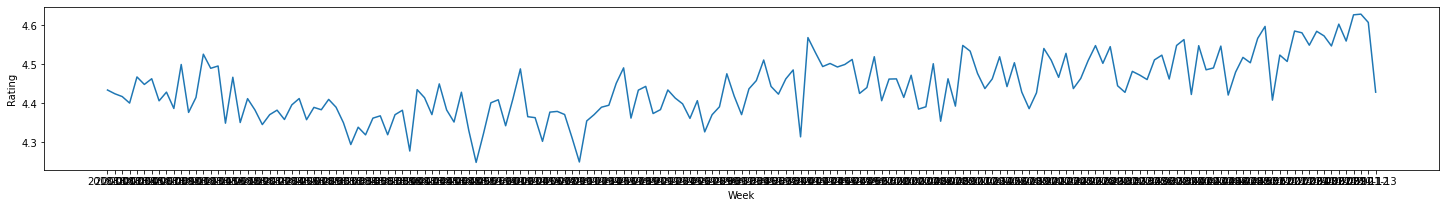

In [5]:
week_average = data.groupby(['Week']).mean()

plt.figure(figsize=(25,3))
plt.plot(week_average.index, week_average['Rating'])
plt.xlabel('Week')
plt.ylabel('Rating')
plt.show()

### Rating average by month

In [6]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
data['Month']

0        2021-04
1        2021-04
2        2021-04
3        2021-04
4        2021-04
          ...   
44995    2018-01
44996    2018-01
44997    2018-01
44998    2018-01
44999    2018-01
Name: Month, Length: 45000, dtype: object

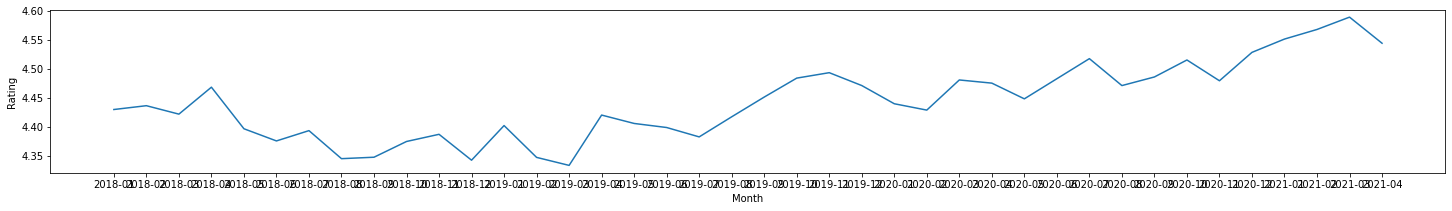

In [7]:
month_average = data.groupby(['Month']).mean()

plt.figure(figsize=(25,3))
plt.plot(month_average.index, month_average['Rating'])
plt.xlabel('Month')
plt.ylabel('Rating')
plt.show()

In [8]:
month_average.head()

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420


### Average rating by month by course

<AxesSubplot:xlabel='Month'>

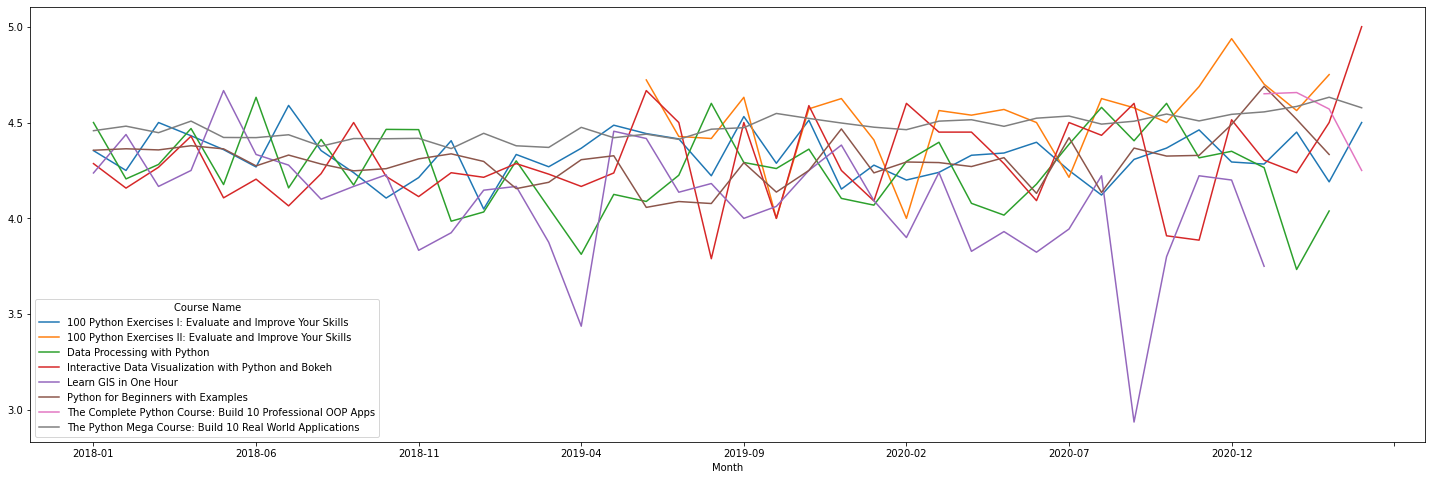

In [9]:
# Multi-index dataframe
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].mean().unstack()

month_average_crs.plot(figsize=(25,8))

In [10]:
month_average_crs

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2018-01,4.353448,NaN,4.500000,4.285714,4.236842,4.355422,NaN,4.457368
2018-02,4.250000,NaN,4.205882,4.157895,4.437500,4.363095,NaN,4.481070
2018-03,4.500000,NaN,4.281250,4.266667,4.166667,4.357143,NaN,4.447037
2018-04,4.431034,NaN,4.468750,4.428571,4.250000,4.378947,NaN,4.507412
2018-05,4.358696,NaN,4.176471,4.107143,4.666667,4.362654,NaN,4.422085
2018-06,4.268293,NaN,4.631579,4.204545,4.333333,4.273876,NaN,4.421264
2018-07,4.589286,NaN,4.159091,4.065217,4.277778,4.330239,NaN,4.436156
2018-08,4.353659,NaN,4.411765,4.233333,4.100000,4.283388,NaN,4.376494
2018-09,4.238636,NaN,4.173913,4.500000,4.166667,4.247967,NaN,4.416413


### What day are people happiest?

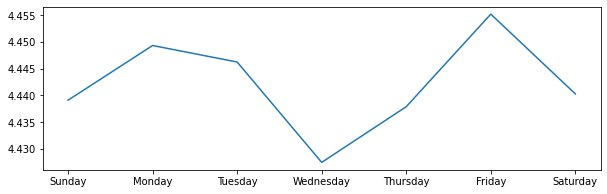

In [16]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')

weekday_average.index.get_level_values(0)
plt.figure(figsize=(10,3))
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])
plt.show()

In [17]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=None, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : li

### Number of ratings by course

In [ ]:
share = 